In [16]:
# Python imports, put at the top for simplicity
from logaut import ltl2dfa
from mdp_dp_rl.algorithms.dp.dp_analytic import DPAnalytic
from pylogics.parsers import parse_ltl

from stochastic_service_composition.dfa_target import mdp_from_dfa

from docs.notebooks.utils import render_service, render_target, render_mdp_dfa, render_composition_mdp, print_policy_data, \
    print_value_function, print_q_value_function
from stochastic_service_composition.composition import composition_mdp
from stochastic_service_composition.services import build_service_from_transitions, Service
from stochastic_service_composition.target import build_target_from_transitions

In [17]:
DEFAULT_REWARD = 1.0
DEFAULT_BROKEN_REWARD = 0.0
DEFAULT_BROKEN_PROB = 0.05


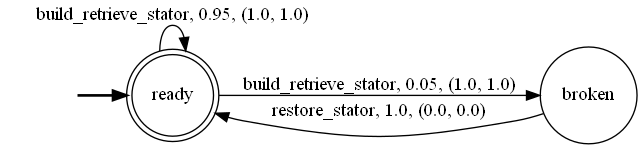

In [18]:
def stator_builder_service(broken_prob: float = DEFAULT_BROKEN_PROB, broken_reward: float = DEFAULT_BROKEN_REWARD, action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the stator builder device."""
    assert 0.0 <= broken_prob <= 1.0
    success_prob = 1.0 - broken_prob
    transitions = {
        "ready": {
          "build_retrieve_stator": ({"ready": success_prob, "broken": broken_prob}, (action_reward, 1.0)),
        },
        "broken": {
            "restore_stator": ({"ready": 1.0}, (broken_reward, 0.0)),
        },

    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states) # type: ignore
service_stator_builder=stator_builder_service()
render_service(service_stator_builder)

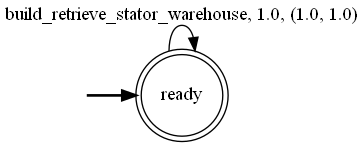

In [19]:
def stator_warehouse_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the stator warehouse device."""
    transitions = {
        "ready": {
            "build_retrieve_stator_warehouse": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_stator_warehouse=stator_warehouse_service()
render_service(service_stator_warehouse)

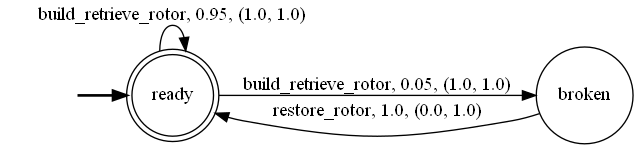

In [20]:
def rotor_builder_service(broken_prob: float = DEFAULT_BROKEN_PROB, broken_reward: float = DEFAULT_BROKEN_REWARD, action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the rotor builder device."""
    assert 0.0 <= broken_prob <= 1.0
    success_prob = 1.0 - broken_prob
    transitions = {
        "ready": {
          "build_retrieve_rotor": ({"ready": success_prob, "broken": broken_prob}, (action_reward, 1.0)),
        },
        "broken": {
            "restore_rotor": ({"ready": 1.0}, (broken_reward, 1.0)),
        },

    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states) # type: ignore
service_rotor_builder=rotor_builder_service()
render_service(service_rotor_builder)

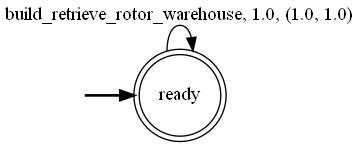

In [21]:
def rotor_warehouse_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the rotor warehouse device."""
    transitions = {
        "ready": {
            "build_retrieve_rotor_warehouse": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_rotor_warehouse=rotor_warehouse_service()
render_service(service_rotor_warehouse)

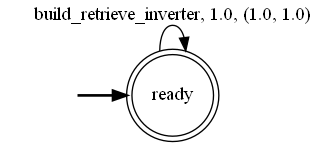

In [22]:
def inverter_warehouse_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the inverter warehouse device."""
    transitions = {
        "ready": {
            "build_retrieve_inverter": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_inverter_warehouse=inverter_warehouse_service()
render_service(service_inverter_warehouse)

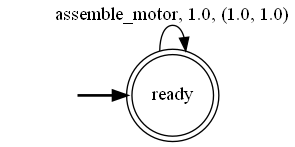

In [23]:
def assembler_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the assembler device."""
    transitions = {
        "ready": {
            "assemble_motor": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_assembler=assembler_service()
render_service(service_assembler)

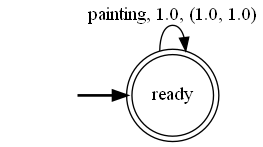

In [24]:
def painter_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the painter device."""
    transitions = {
        "ready": {
            "painting": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_painter=painter_service()
render_service(service_painter)

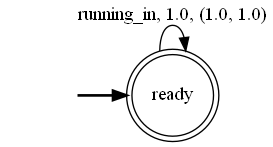

In [25]:
def smart_tester_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the smart tester device."""
    transitions = {
        "ready": {
            "running_in": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_smart_tester=smart_tester_service()
render_service(service_smart_tester)

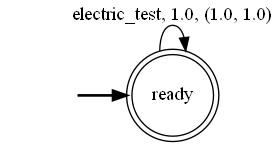

In [26]:
def mechanical_engineer_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the mechanical engineer device."""
    transitions = {
        "ready": {
            "electric_test": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_mechanical_engineer=mechanical_engineer_service()
render_service(service_mechanical_engineer)

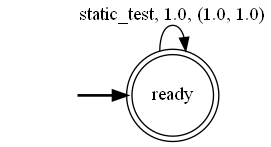

In [27]:
def mechanical_engineer_service(action_reward: float = DEFAULT_REWARD) -> Service:
    """Build the mechanical engineer device."""
    transitions = {
        "ready": {
            "static_test": ({"ready": 1.0}, (action_reward, 1.0)),
        },
    }
    final_states = {"ready"}
    initial_state = "ready"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore
service_mechanical_engineer=mechanical_engineer_service()
render_service(service_mechanical_engineer)

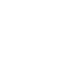

In [28]:
def target_service():
    """Build the target service."""
    #transition_function = {
        #"s0": {
            #"(F build/retrieve_stator & !F (build/retrieve_stator & F build_retrieve_stator))": ("s1", 1.0, 0),
        #},
        #& (F assemble_motor & !F (assemble_motor & F assemble_motor)) & (G(build/retrieve_stator -> X(!build/retrieve_stator U assemble_motor)) & (!assemble_motor W build/retrieve_stator) & G(assemble_motor -> X(!assemble_motor W build/retrieve_stator)))  ": ("s1", 1.0, 0),
        #},
        #"s1": {
        #    "(F assemble_motor & !F (assemble_motor & F assemble_motor)) & (! F(electric_test & F electric_test)) & ((!electric_test W assemble_motor) & G(electric_test -> X(! electric_test W assemble_motor)))": ("s2", 1.0, 0),
        #},
        #"s1": {
            #"(F build/retrieve_rotor & !F (build/retrieve_rotor & F build_retrieve_rotor))": ("s2", 1.0, 0),
        #},
        #& (F assemble_motor & !F (assemble_motor & F assemble_motor)) & (G(build/retrieve_rotor -> X(!build/retrieve_rotor U assemble_motor)) & (!assemble_motor W build/retrieve_rotor) & G(assemble_motor -> X(!assemble_motor W build/retrieve_rotor)))": ("s1", 1.0, 0),
        #},
        #"s1": {
        #    "(F assemble_motor & !F (assemble_motor & F assemble_motor)) & (! F(static_test & F static_test)) & ((!static_test W assemble_motor) & G(static_test -> X(! static_test W assemble_motor)))": ("s4", 1.0, 0),
        #},
        #"s2": {
            #"(F build/retrieve_inverter & !F (build/retrieve_inverter & F build_retrieve_inverter))": ("s3", 1.0, 0),
        #},
            #& (F assemble_motor & !F (assemble_motor & F assemble_motor)) & (G(build/retrieve_inverter -> X(!build/retrieve_inverter U #assemble_motor)) & (!assemble_motor W build/retrieve_inverter) & G(assemble_motor -> X(!assemble_motor W #build/retrieve_inverter)))": ("s1", 1.0, 0),
        #},
        #"s3": {
            #"(G(build/retrieve_inverter -> X(!build/retrieve_inverter U assemble_motor)) & (!assemble_motor W build/retrieve_inverter) & #G(assemble_motor -> X(!assemble_motor W build/retrieve_inverter))) & (F assemble_motor & !F (assemble_motor & F assemble_motor)) & ": ("s4", 1.0, 0),
        #},
            #"& (F running_in & !F (running_in & F running_in)) & (G(assemble_motor -> X(!assemble_motor U running_in)) & (!running_in W assemble_motor) & G(running_in -> X (!running_in W assemble_motor))))": ("s4", 1.0, 0),
        #},
        #"s4": {
            #"((!painting W assemble_motor) & G(painting -> X(! painting W assemble_motor))) & (! F(painting & F painting))": ("s5", 1.0, 0),
        #},
        #"s5": {
            #"(F running_in & !F (running_in & F running_in))": ("s6", 1.0, 0),
        #},
        #"s6": {
            #"(! F(static_test & F static_test))": ("s7", 1.0, 0),
        #},
        #"s7": {
            #"(!(F static_test & F electric_test)) & (! F(electric_test & F electric_test))": ("s0", 1.0, 1.0),
        #},

    #}

    #initial_state = "s0"
    #final_states = {"s0"}
    formula= parse_ltl("(F build_retrieve_stator & !F (build_retrieve_stator & F build_retrieve_stator)) & (F assemble_motor & !F (assemble_motor & F assemble_motor)) & (G(build_retrieve_stator -> X(!build_retrieve_stator U assemble_motor)) & (!assemble_motor W build_retrieve_stator) & G(assemble_motor -> X(!assemble_motor W build_retrieve_stator))) & (F build_retrieve_rotor & !F (build_retrieve_rotor & F build_retrieve_rotor)) & (G(build_retrieve_rotor -> X(!build_retrieve_rotor U assemble_motor)) & (!assemble_motor W build_retrieve_rotor) & G(assemble_motor -> X(!assemble_motor W build_retrieve_rotor))) & (F build_retrieve_inverter & !F (build_retrieve_inverter & F build_retrieve_inverter)) & (G(build_retrieve_inverter -> X(!build_retrieve_inverter U assemble_motor)) & (!assemble_motor W build_retrieve_inverter) & G(assemble_motor -> X(!assemble_motor W build_retrieve_inverter))) & (! F(painting & F painting)) & ((!painting W assemble_motor) & G(painting -> X(! painting W assemble_motor))) & (F running_in & !F (running_in & F running_in)) & (G(assemble_motor -> X(!assemble_motor U running_in)) & (!running_in W assemble_motor) & G(running_in -> X (!running_in W assemble_motor))) & (! F(static_test & F static_test)) & ((!static_test W assemble_motor) & G(static_test -> X(! static_test W assemble_motor))) & (!(F electric_test & F static_test)) & (! F(electric_test & F electric_test)) & ((!electric_test W assemble_motor) & G(electric_test -> X(! electric_test W assemble_motor)))")
    automaton = ltl2dfa(formula, backend="lydia")
    return mdp_from_dfa(
        automaton #transition_function, initial_state, final_states
    )

target = target_service()
render_mdp_dfa(target)

In [ ]:
all_services = [
    service_stator_builder,
    service_stator_warehouse,
    service_rotor_builder,
    service_rotor_warehouse,
    service_inverter_warehouse,
    service_assembler,
    service_painter,
    service_smart_tester,
    service_mechanical_engineer,
]

mdp = composition_mdp(target, *all_services, gamma=0.9)
render_composition_mdp(mdp)

In [ ]:
opn = DPAnalytic(mdp, 1e-4)
opt_policy = opn.get_optimal_policy_vi()
value_function = opn.get_value_func_dict(opt_policy)
q_value_function = opn.get_act_value_func_dict(opt_policy)

# remove '0' state to sort output
opt_policy.policy_data.pop(0, None)
value_function.pop(0, None)
_ = q_value_function.pop(0, None)

In [ ]:
print_policy_data(opt_policy)

In [ ]:
print_value_function(value_function)

In [ ]:
print_q_value_function(q_value_function)